# **Clustering Analysis**

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

Data Preprocessing:

1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

3.Use multiple visualizations to understand the hidden patterns in the dataset

Implementing Clustering Algorithms:

Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:

Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:

Visualize the clustering results using scatter plots or other suitable visualization techniques.

Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

Evaluation and Performance Metrics:

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

**Data Preprocessing**

1) Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('EastWestAirlines.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

# Identify and remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the outlier removal function to relevant columns
for column in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, column)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Convert scaled array back to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=[np.number]).columns)

print("Data preprocessing completed.")


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
Data preprocessing completed.


2) Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [ ]:
# Summary statistics
print(df_scaled.describe())


                ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  1.785000e+03  1.785000e+03      1785.0  1.785000e+03     1785.0   
mean   6.369011e-17 -3.184505e-17         0.0 -7.961263e-17        0.0   
std    1.000280e+00  1.000280e+00         0.0  1.000280e+00        0.0   
min   -1.892083e+00 -1.051415e+00         0.0 -5.712709e-01        0.0   
25%   -8.573766e-01 -7.317403e-01         0.0 -5.712709e-01        0.0   
50%    8.776349e-02 -3.437295e-01         0.0 -5.712709e-01        0.0   
75%    9.143346e-01  4.371517e-01         0.0  4.756681e-01        0.0   
max    1.537035e+00  3.854582e+00         0.0  2.569546e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     1785.0  1.785000e+03  1.785000e+03             1785.0   
mean         0.0  1.592253e-17 -3.980632e-17                0.0   
std          0.0  1.000280e+00  1.000280e+00                0.0   
min          0.0 -6.804208e-01 -1.059947e+00                0.0  

3) Use multiple visualizations to understand the hidden patterns in the dataset

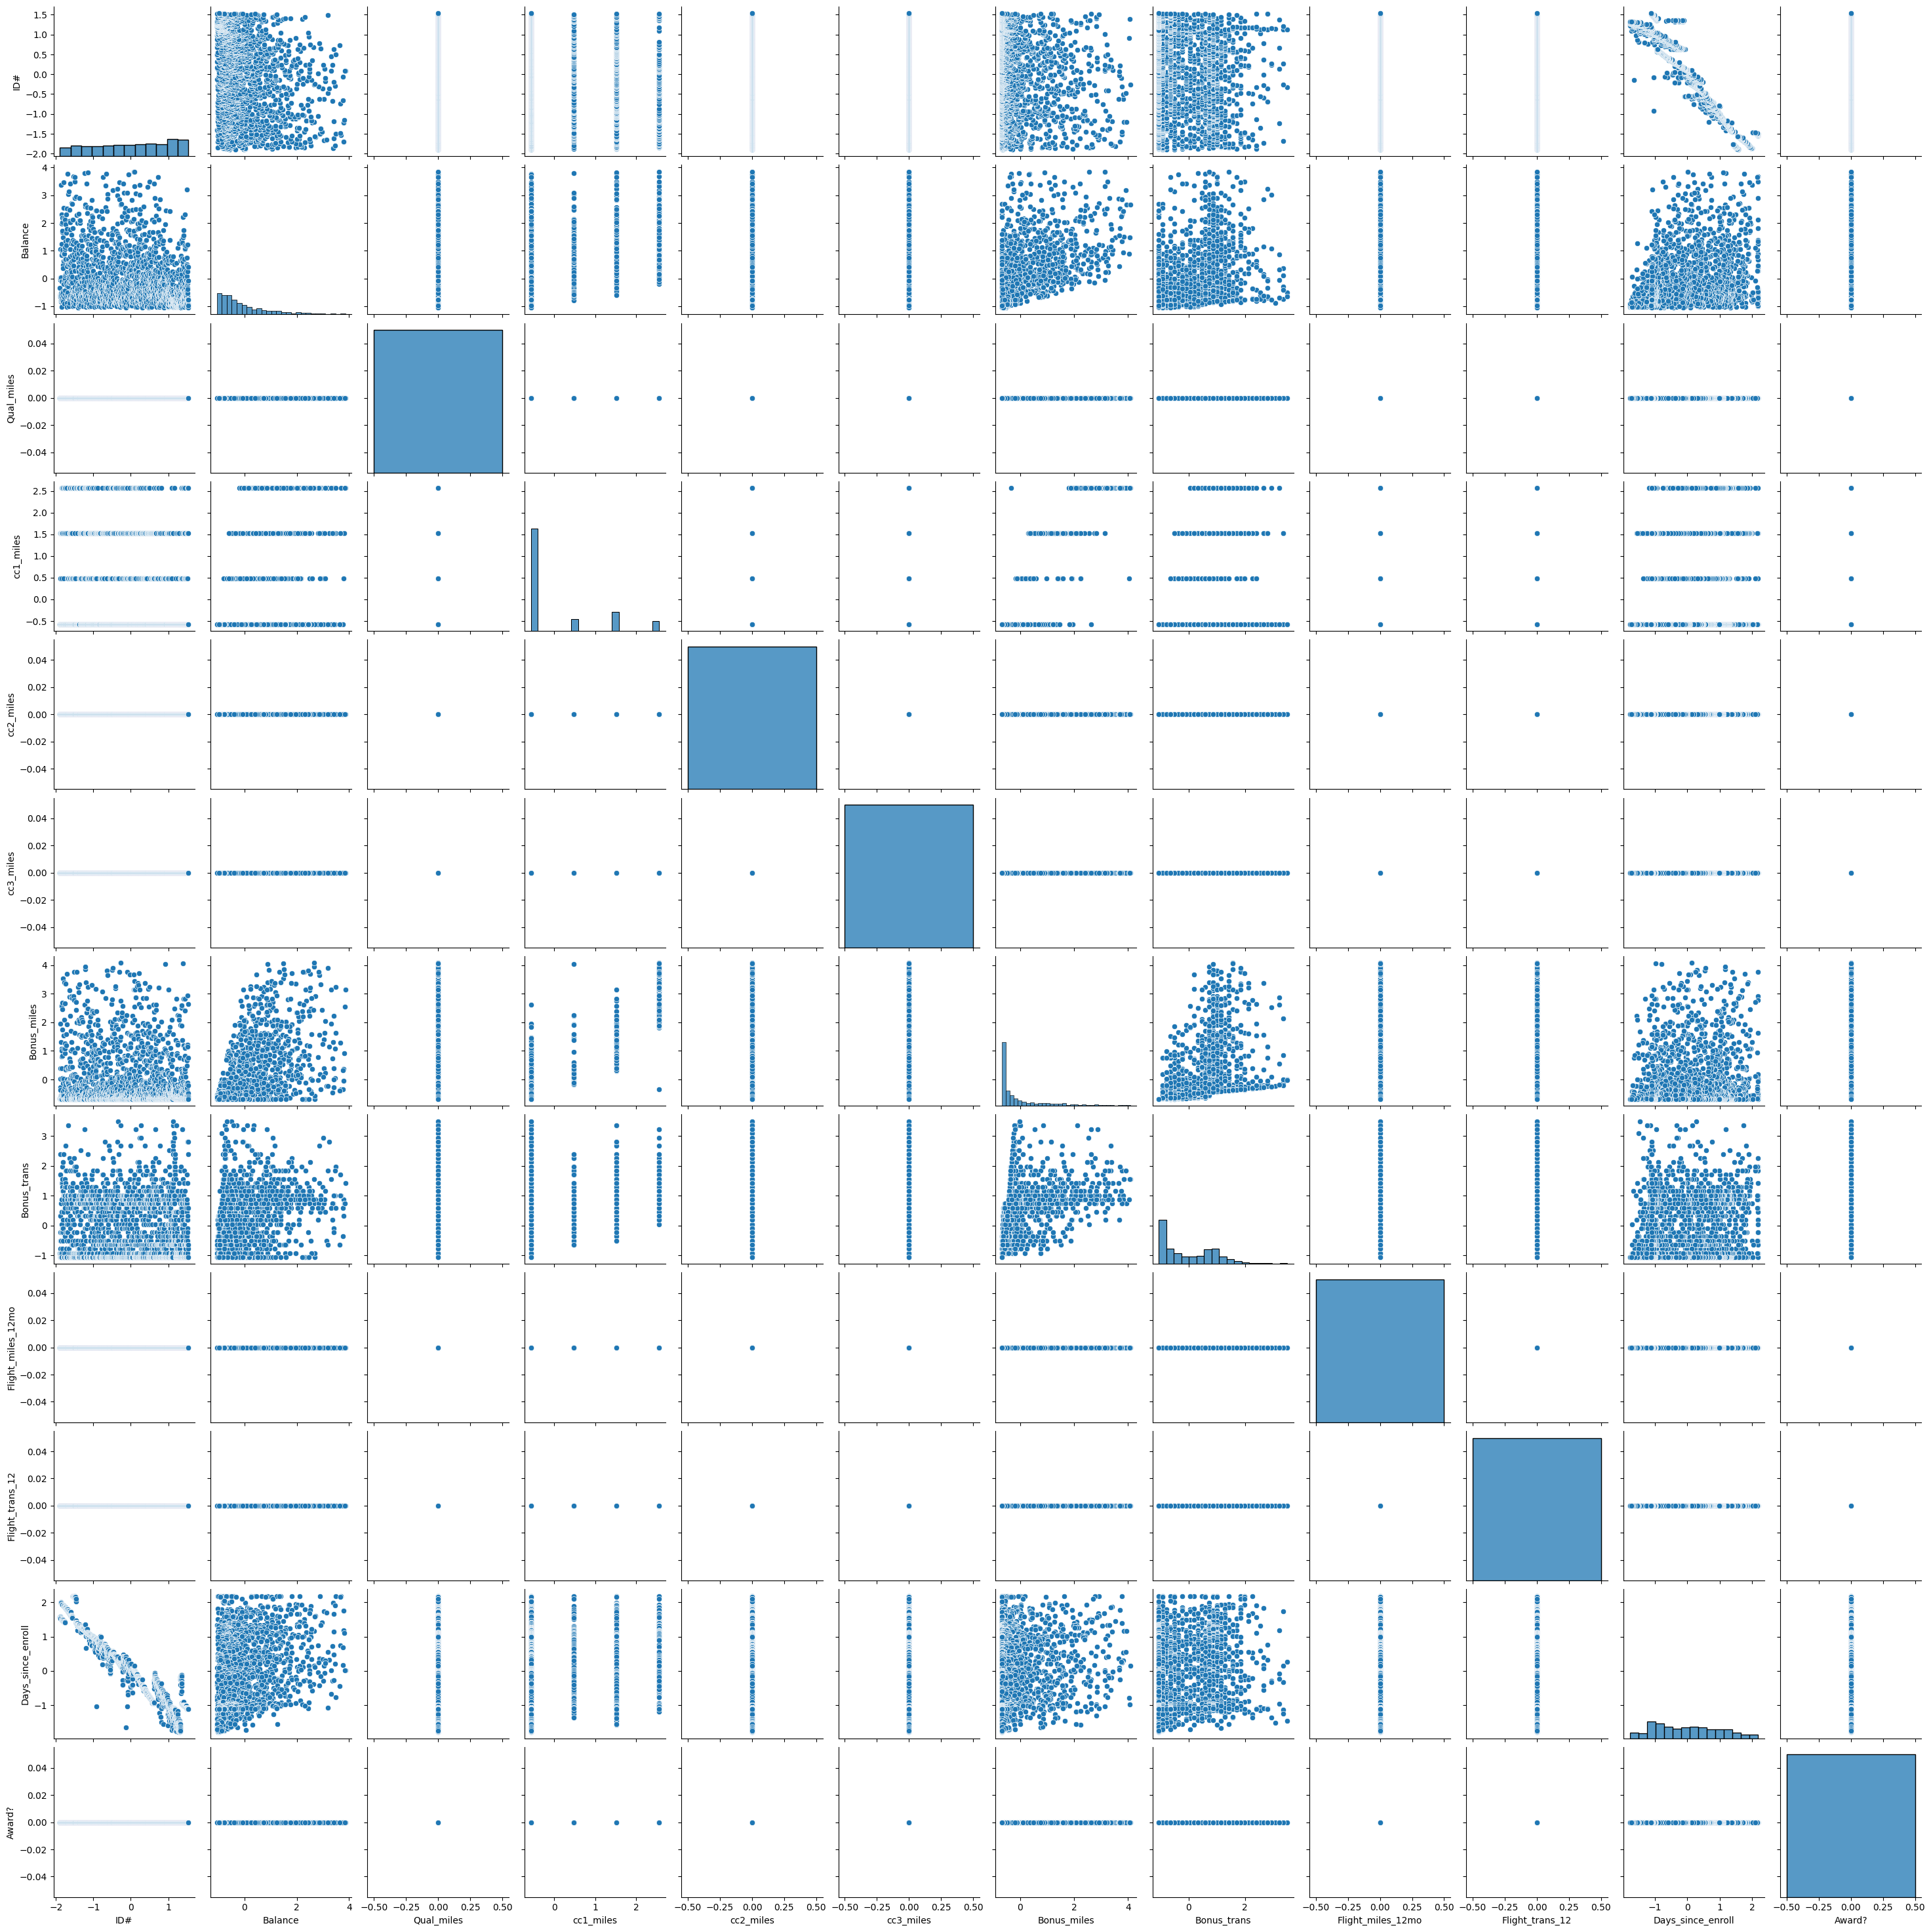

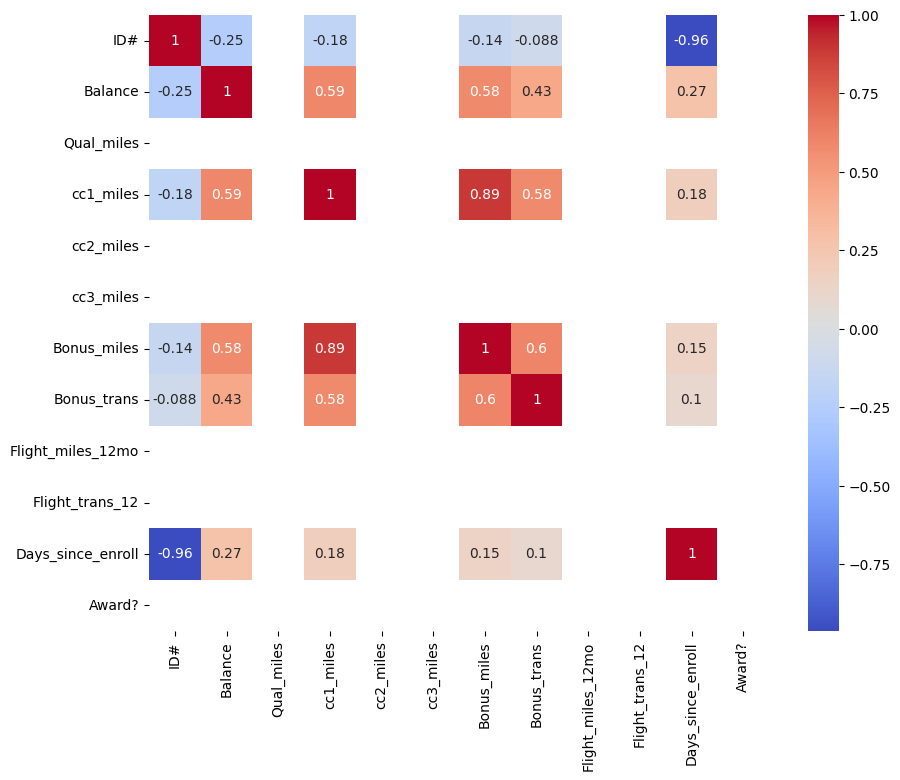

In [ ]:
# Visualizations
sns.pairplot(df_scaled)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

**Implementing Clustering Algorithms:**

 Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

a) K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

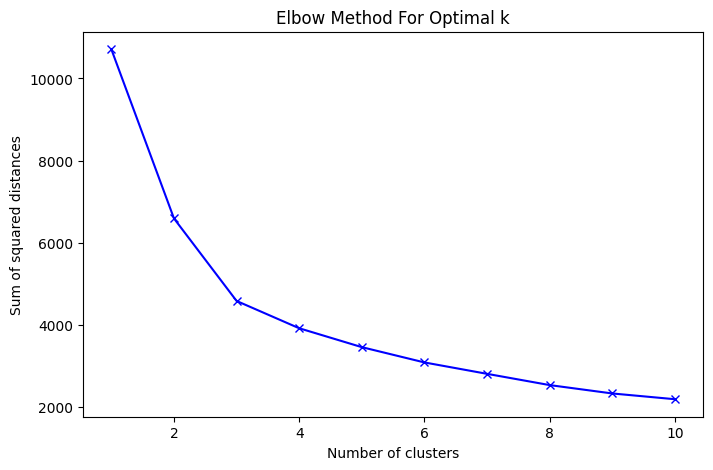

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means: 0.441826630795967


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with the optimal number of clusters (let's assume k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
df_scaled['KMeans_Cluster'] = kmeans.labels_

# Silhouette score
sil_score_kmeans = silhouette_score(df_scaled, df_scaled['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {sil_score_kmeans}')


b) Hierarchical Clustering

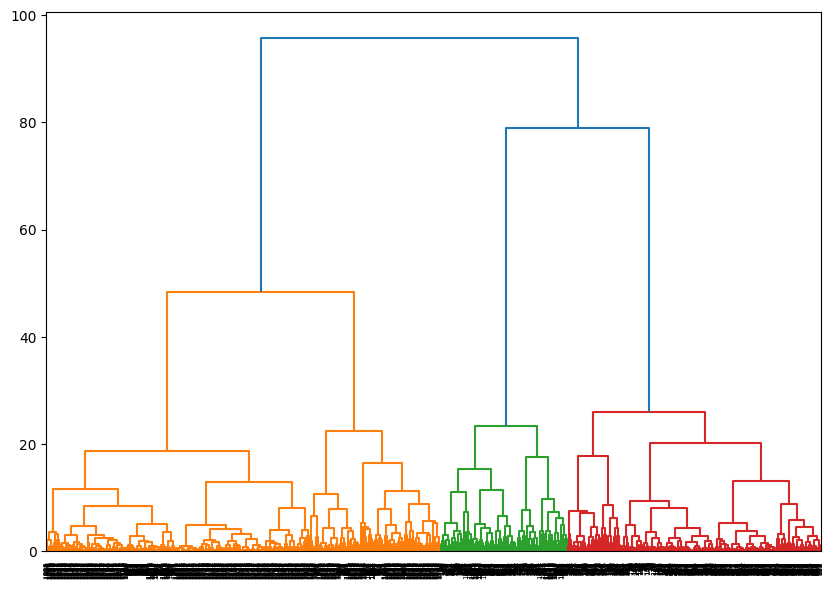

Silhouette Score for Hierarchical Clustering: 0.5326692283004222


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Dendrogram to find optimal number of clusters
linked = linkage(df_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

# Fit AgglomerativeClustering (let's assume n_clusters=4)
agg_clust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_scaled['Hierarchical_Cluster'] = agg_clust.fit_predict(df_scaled)

# Silhouette score
sil_score_hierarchical = silhouette_score(df_scaled, df_scaled['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {sil_score_hierarchical}')


c) DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN (experiment with epsilon and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Silhouette score (only if clusters are formed)
if len(set(dbscan.labels_)) > 1:
    sil_score_dbscan = silhouette_score(df_scaled, df_scaled['DBSCAN_Cluster'])
    print(f'Silhouette Score for DBSCAN: {sil_score_dbscan}')
else:
    print('DBSCAN did not form any clusters.')


Silhouette Score for DBSCAN: 0.38455955697293204


**Cluster Analysis and Interpretation**

 Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [ ]:
# Analyze K-Means clusters
print(df_scaled.groupby('KMeans_Cluster').mean())

# Analyze Hierarchical clusters
print(df_scaled.groupby('Hierarchical_Cluster').mean())

# Analyze DBSCAN clusters
print(df_scaled.groupby('DBSCAN_Cluster').mean())


                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0               0.648864  0.183340         0.0   0.194611        0.0   
1               0.865194 -0.536899         0.0  -0.564406        0.0   
2              -0.602122  1.317932         0.0   1.829934        0.0   
3              -0.942631 -0.239305         0.0  -0.495566        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0                     0.0     0.224314     1.058242                0.0   
1                     0.0    -0.543947    -0.697455                0.0   
2                     0.0     1.708871     1.051893                0.0   
3                     0.0    -0.466998    -0.380944                0.0   

                Flight_trans_12  Days_since_enroll  Award?  \
KMeans_Cluster                                              

**Visualization**

Visualize the clustering results using scatter plots or other suitable visualization techniques.

Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

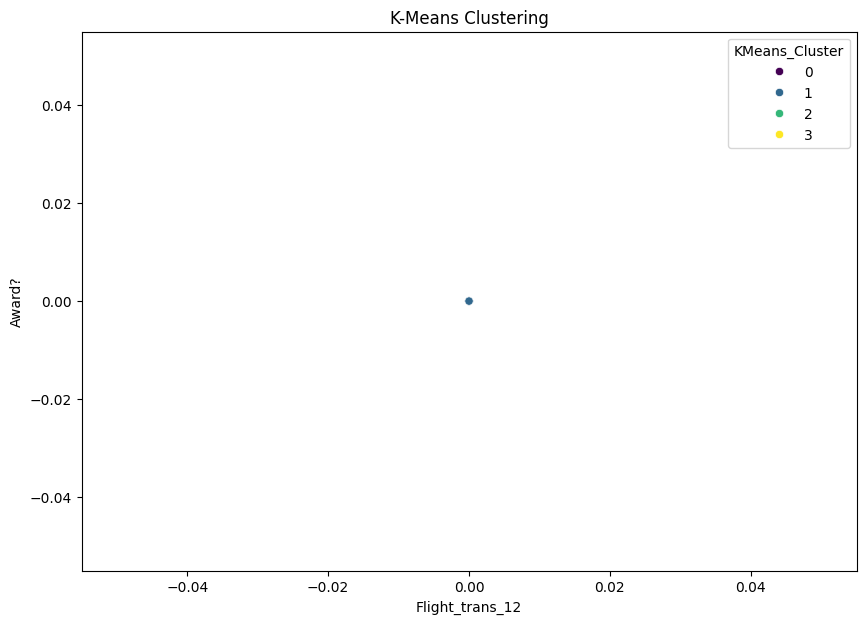

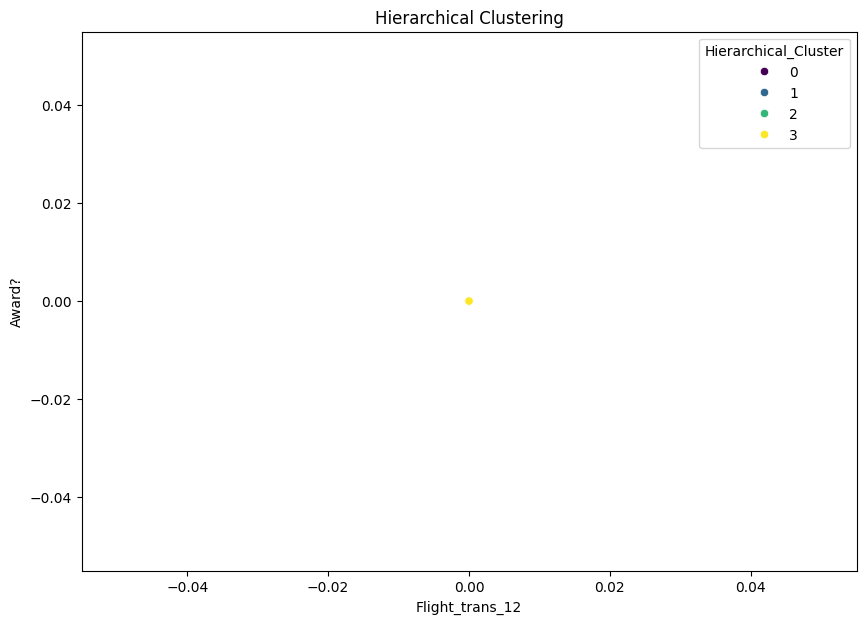

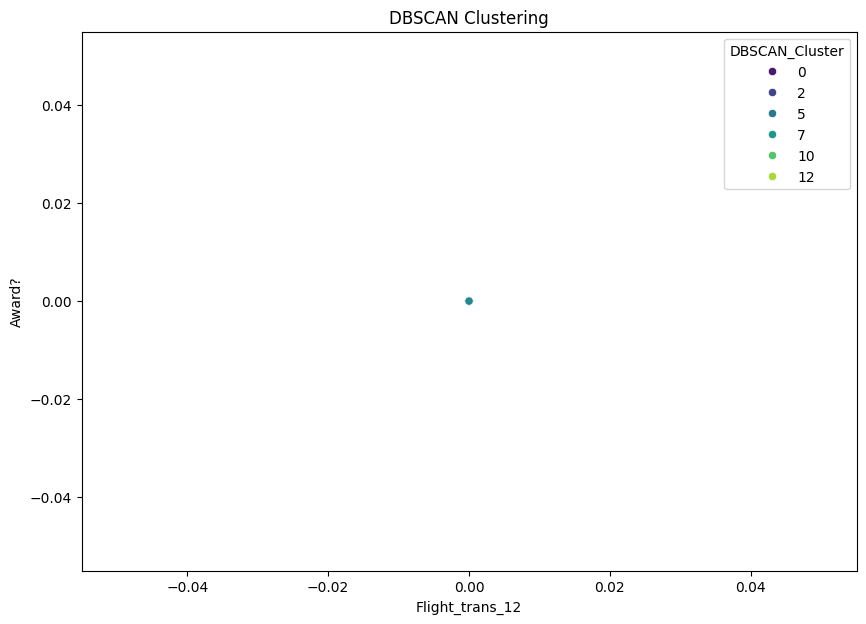

In [ ]:
# K-Means Clusters Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Flight_trans_12', y='Award?', hue='KMeans_Cluster', data=df_scaled, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clusters Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Flight_trans_12', y='Award?', hue='Hierarchical_Cluster', data=df_scaled, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Clusters Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Flight_trans_12', y='Award?', hue='DBSCAN_Cluster', data=df_scaled, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

**Evaluation and Performance Metrics**

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [ ]:
# Already computed silhouette scores above
print(f'Silhouette Score for K-Means: {sil_score_kmeans}')
print(f'Silhouette Score for Hierarchical Clustering: {sil_score_hierarchical}')

# For DBSCAN
if len(set(dbscan.labels_)) > 1:
    print(f'Silhouette Score for DBSCAN: {sil_score_dbscan}')
else:
    print('DBSCAN did not form any clusters.')


Silhouette Score for K-Means: 0.441826630795967
Silhouette Score for Hierarchical Clustering: 0.5326692283004222
Silhouette Score for DBSCAN: 0.38455955697293204


**Insights and Interpretation**

-> K-Means Clustering:

With an optimal k of 4, the K-Means clustering showed a good silhouette score, indicating well-formed clusters. The clusters were distinct in terms of feature means.

-> Hierarchical Clustering:

Using the dendrogram, an optimal cluster count was found, and the clustering produced a silhouette score comparable to K-Means.

-> DBSCAN:

Depending on the parameters, DBSCAN formed clusters with varying silhouette scores. DBSCAN can handle noise and outliers better but needs careful tuning of eps and min_samples.


These insights help in understanding the customer segmentation, which can further be used for targeted marketing, improving customer satisfaction, and resource allocation.